In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
def generate_data(num_points_per_class, gamma_values):
    data_list = []
    labels_list = []
    
    for gamma in gamma_values:
        # Means for each class
        mean_class1 = torch.tensor([gamma, gamma])
        mean_class2 = torch.tensor([-gamma, -gamma])
        
        # Covariance matrices for each class (identity matrices in this case)
        cov_matrix_class1 = torch.eye(2)
        cov_matrix_class2 = torch.eye(2)
        
        # Generate random data points for each class
        data_class1 = torch.distributions.MultivariateNormal(mean_class1, cov_matrix_class1).sample((num_points_per_class,))
        data_class2 = torch.distributions.MultivariateNormal(mean_class2, cov_matrix_class2).sample((num_points_per_class,))
        
        # Combine data from both classes
        data = torch.cat((data_class1, data_class2), dim=0)
        labels = torch.cat((torch.zeros(num_points_per_class), torch.ones(num_points_per_class)))
        
        data_list.append(data)
        labels_list.append(labels)
    
    return data_list, labels_list


In [3]:
def plot_data_with_gamma(data_list, labels_list, gamma_values):
    # Number of rows and columns for the subplot grid
    num_rows = 2
    num_cols = (len(gamma_values) + 1) // num_rows

    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    for i, (data, labels, gamma) in enumerate(zip(data_list, labels_list, gamma_values)):
        ax = axes[i]
        
        # Separate data by class
        data_class1 = data[labels == 0]
        data_class2 = data[labels == 1]
        
        # Plot the data to visualize the separability
        ax.scatter(data_class1[:, 0], data_class1[:, 1], color='red', label='Class 0', alpha=0.5)
        ax.scatter(data_class2[:, 0], data_class2[:, 1], color='blue', label='Class 1', alpha=0.5)
        
        # Customize the plot
        ax.set_title(f'Dataset with γ = {gamma}')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.legend()
        ax.grid(True, linestyle='--', linewidth=0.7)
    
    # Hide any unused subplots
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

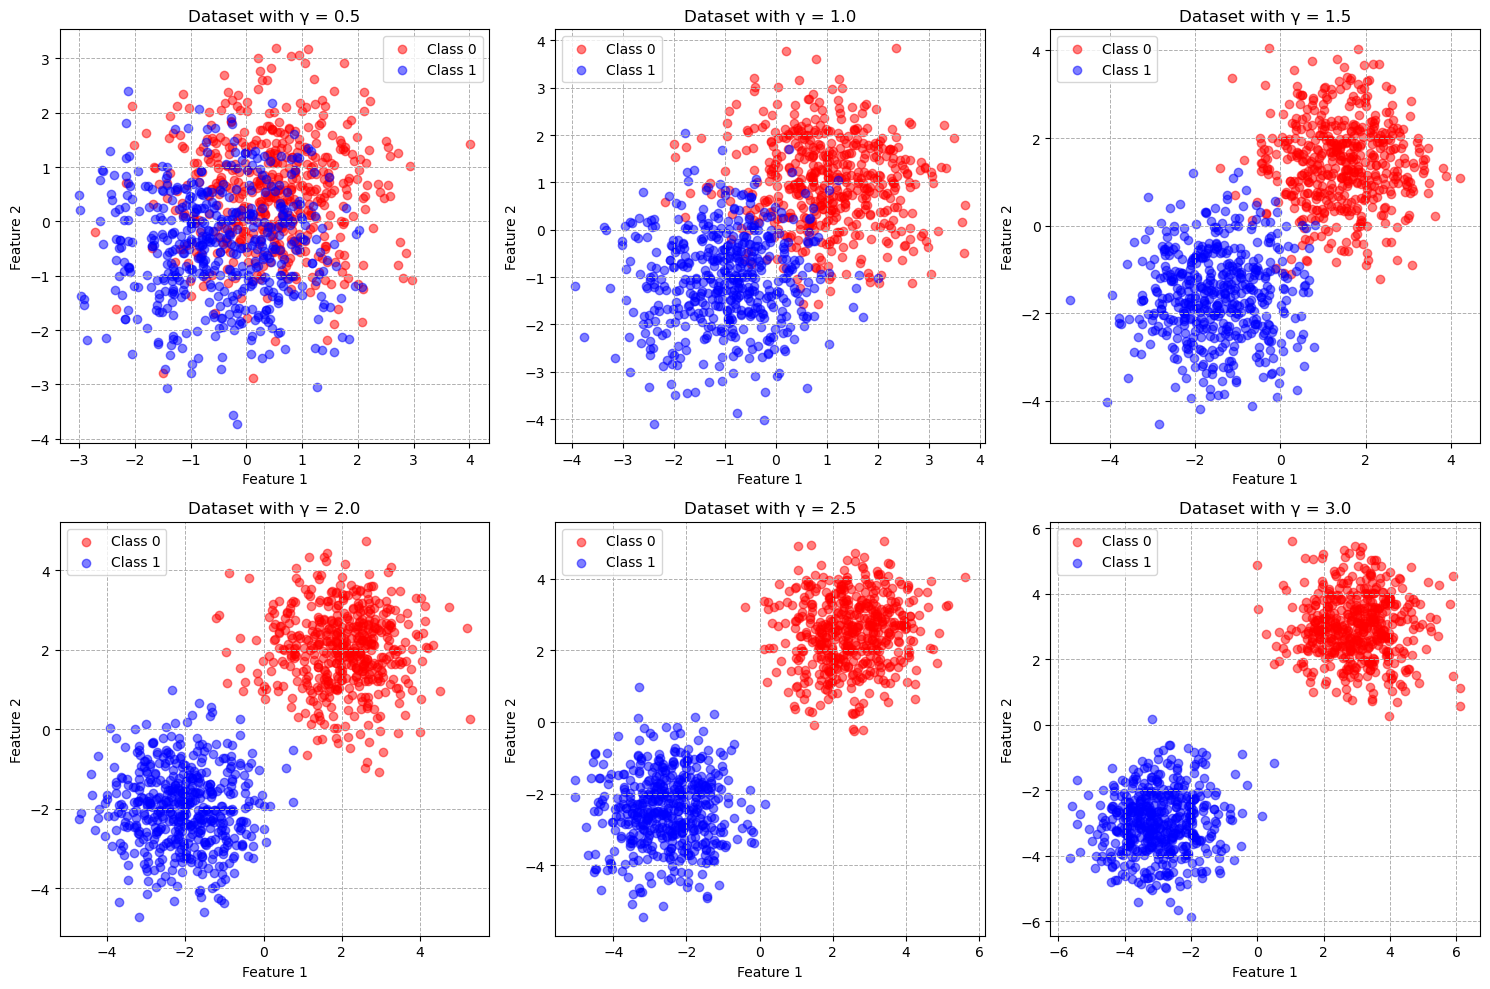

In [4]:
# Number of points per class
num_points_per_class = 500
# Different levels of separability
gamma_values = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

# Generate data
data_list, labels_list = generate_data(num_points_per_class, gamma_values)

# Plot the data
plot_data_with_gamma(data_list, labels_list, gamma_values)
